💀 Сложное задание! 💀

Соберите все данные из папки data в один датафрэйм, имеющий следующие столбцы: колонки из самих файлов (product_id, quantity), имя пользователя (name), и дату этих покупок (date), соответствует названию папки, где лежит папка с пользователем).

Пример итоговой таблицы:

`    product_id  quantity    name             date
0       56          2         Anatoly_Karpov   2020-12-30
1       7           2         Anatoly_Karpov   2020-12-30
2       9           3         Anatoly_Karpov   2020-12-30`

Для объединения датафреймов, читаемых из файлов, можно использовать метод pd.concat(). Например:

1. Имеются следующие данные:
`> df_1
    product_id  quantity    name               date
0       56          2         Anatoly_Karpov     2020-12-30
1       7           2         Anatoly_Karpov     2020-12-30
2       9           3         Anatoly_Karpov     2020-12-30`

`> df_2
    product_id  quantity    name               date
0       4           2         Кatya_Skriptsova   2020-12-30
1       71          1         Кatya_Skriptsova   2020-12-31`

2. Соединяем, передав pd.concat на вход список датафреймов, которые нужно объединить. Обратите внимание: индексы повторяются, поэтому после соединения всех данных нужно их сбросить.

`> df = pd.concat([df_1, df_2])`

`> df`

`    product_id  quantity    name                date
0       56          2         Anatoly_Karpov      2020-12-30
1       7           2         Anatoly_Karpov      2020-12-30
2       9           3         Anatoly_Karpov      2020-12-30
0       4           2         Кatya_Skriptsova    2020-12-30
1       71          1         Кatya_Skriptsova    2020-12-31`

В качестве ответа укажите сумму по колонке quantity.

In [77]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
dataframe = pd.DataFrame()
for address, dirs, files in os.walk("data/"):
    for names in files:
        put = os.path.join(address, name)
        df1 = pd.read_csv(put)
        splited_way= put.split("/")
        df1["names"]=splited_way[2]
        df1["date"]=splited_way[1]
        dataframe = pd.concat([dataframe,df1]).reset_index(drop=True)
pd.DataFrame(dataframe)

dataframe.quantity.sum()

480

In [46]:
dataframe['date'] = pd.to_datetime(dataframe['date'])

Выясните, какой пользователь купил больше всего товаров. Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке. Например:

Anatoly_Karpov, Nekto_Ktotovich, Lena_Uhanova, Ignat, Sasha_Tokarev

In [61]:
dataframe.groupby("names", as_index=False)\
    .agg({"quantity": "sum"})\
    .sort_values(by="quantity", ascending=False)\
    .head(2)

,names,quantity
3,Alexey_Smirnov,52
13,Petr_Smirnov,52


Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот (столбчатую диаграмму, sns.barplot), где:

по оси x – идентификаторы товаров (product_id) 

по оси y – суммарное число их покупок (сколько товаров с таким product_id было продано)

Для практики попробуйте изменить параметры графика: цвет (color), прозрачность (alpha), сортировку значений по оси х (order). 

В качестве ответа укажите, сколько было продано единиц товара с product_id равным 56.

In [70]:
quantity_prod = dataframe.groupby("product_id",as_index=False).agg({"quantity": "sum"})

In [74]:
quantity_prod.query("product_id == 56")

,product_id,quantity
42,56,18


<AxesSubplot: xlabel='product_id', ylabel='quantity'>

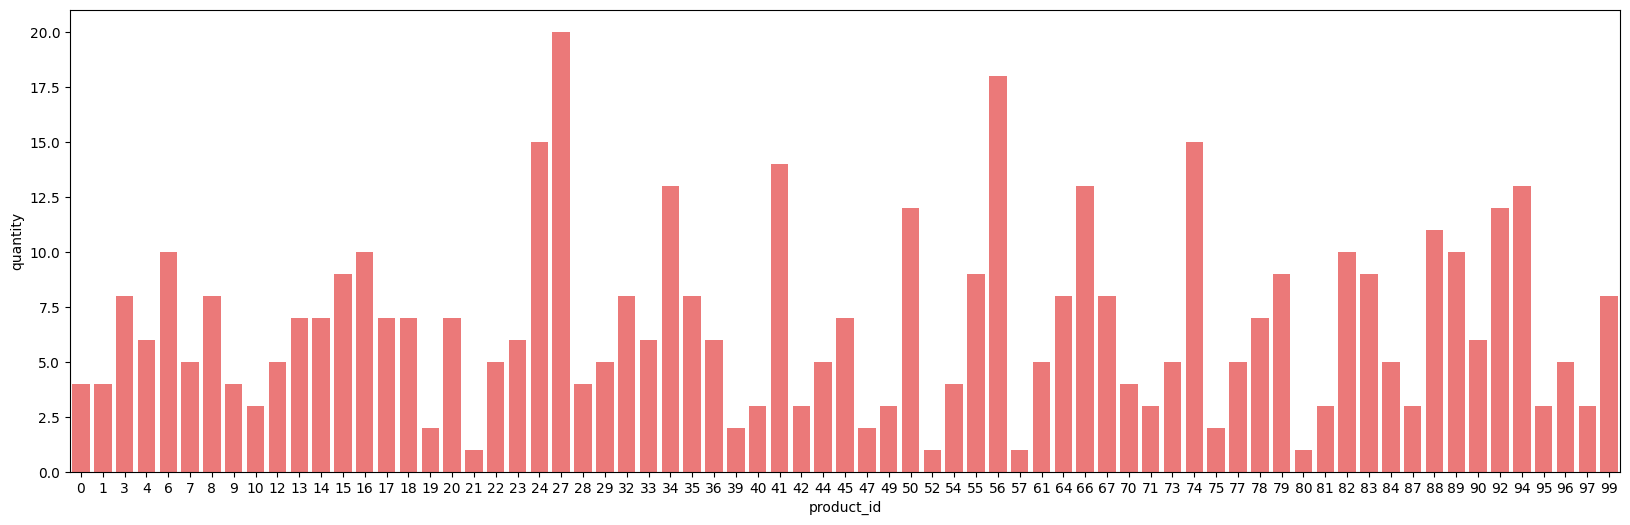

In [95]:
plt.figure(figsize=(20,6))
sns.barplot(quantity_prod, x="product_id", y="quantity",color="r",alpha=0.6)

Посмотрим на продажи по дням! Для визуализации снова используйте барплот, только теперь по оси x будут дни, по которым у нас есть данные (date). Далее выберите верные утверждения:

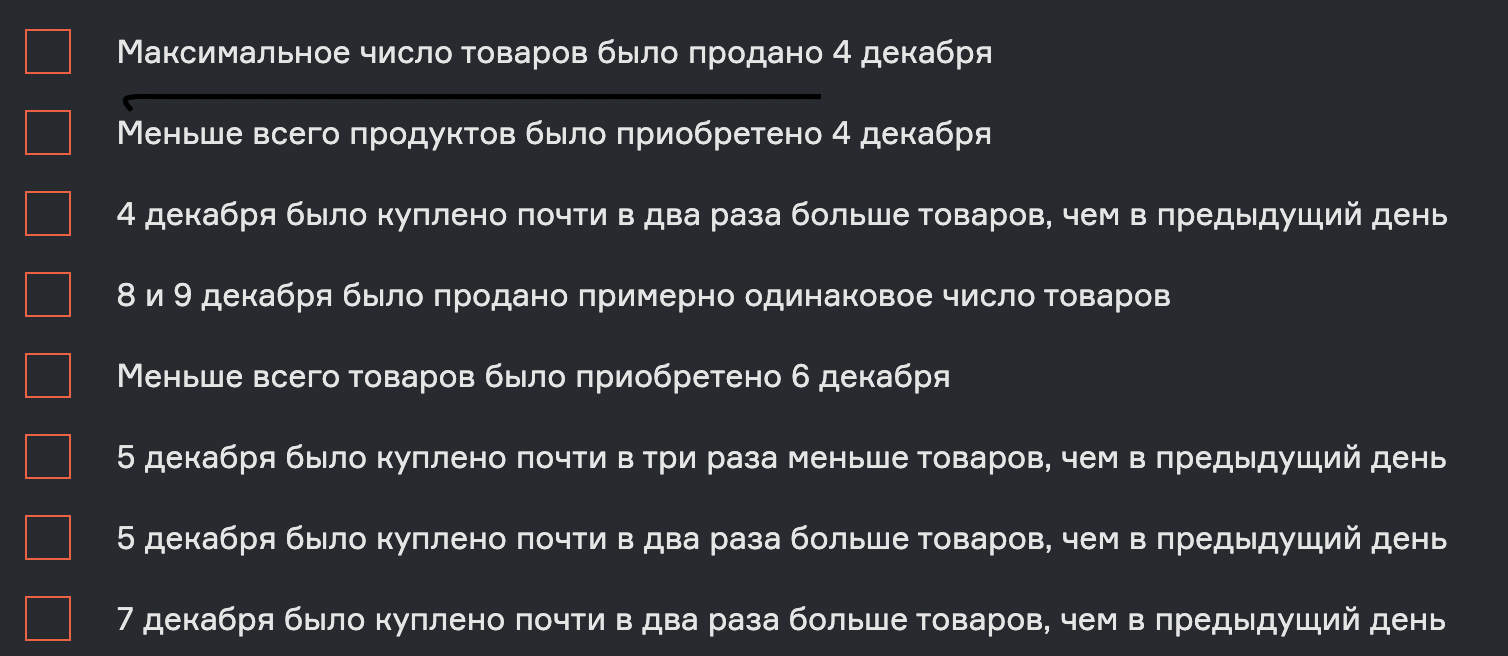

In [97]:
quantity_date = dataframe.groupby("date",as_index=False).agg({"quantity": "sum"})
quantity_date

,date,quantity
0,2020-12-03,60
1,2020-12-04,113
2,2020-12-05,61
3,2020-12-06,15
4,2020-12-07,94
5,2020-12-08,68
6,2020-12-09,69


<AxesSubplot: xlabel='date', ylabel='quantity'>

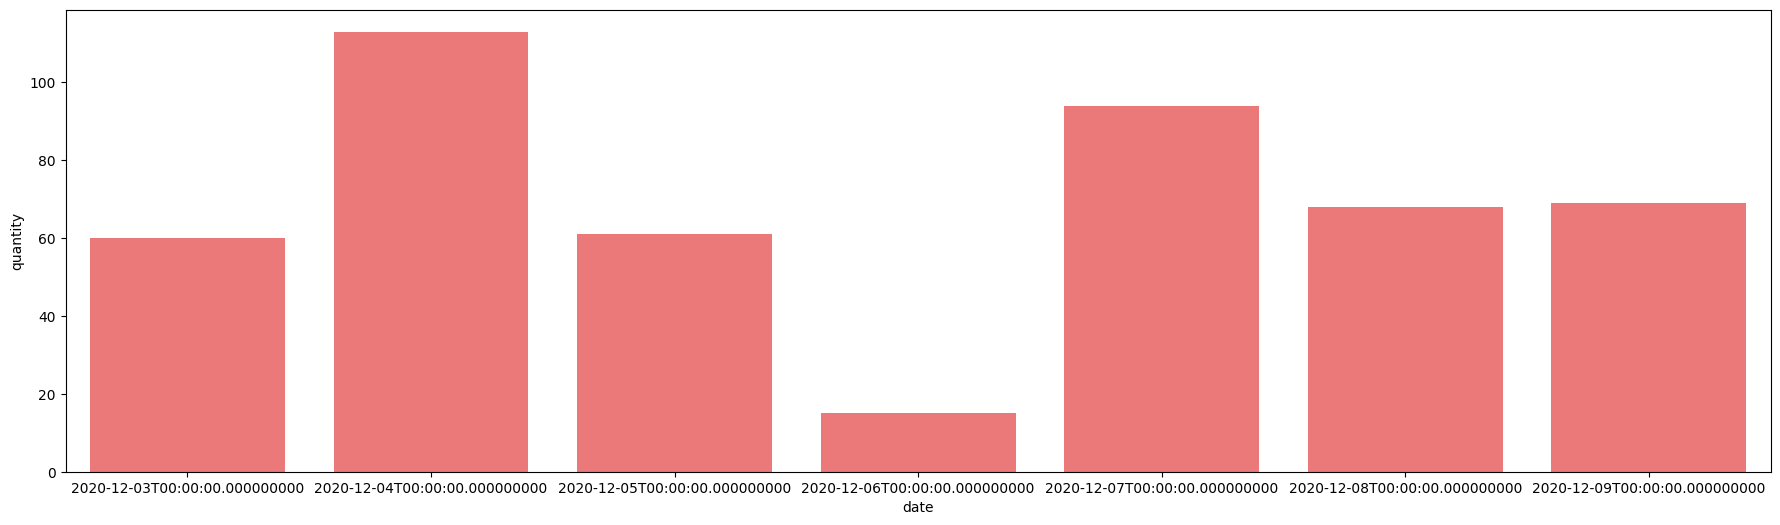

In [99]:
plt.figure(figsize=(22,6))
sns.barplot(quantity_date, x="date", y="quantity",color="r",alpha=0.6)

💀 Сложное задание! 💀

Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни. 

Например, пользователь Sasha Tsarev дважды приобрел товар 6. Поскольку покупка была совершена в один и тот же день, повторной в данном случае она считаться не будет. Katya Skriptsova также сделал две покупки товара 7, но в разные дни, поэтому этот случай засчитывается.
    

`product_id quantity name              date
25         2        Katya Skriptsova  2020-12-05
54         1        Olya Silyutina    2020-12-05    
7          4        Katya Skriptsova  2020-12-05  
6          4        Sasha Tsarev      2020-12-06
6          1        Sasha Tsarev      2020-12-06
7          5        Katya Skriptsova  2020-12-06  `

Может пригодиться: .drop_duplicates()

In [130]:
df_dup = dataframe.drop_duplicates(subset=['names', "product_id", "date"])
dataframe.names.nunique()
df_dup.groupby(["names", "product_id"],as_index=False)\
    .agg({"date": "count"})\
    .query("date >1")\
    .nunique()

names         2
product_id    2
date          1
dtype: int64